# Email Spam Classifier

   ![](https://media.giphy.com/media/KxlbRn0HuTW7gZID83/giphy.gif )

#### The objective is to develop a machine learning model that can categorize emails into two categories: spam and non-spam (often referred to as "ham"). 

#### This model will help us filter out unwanted and potentially harmful emails from our inbox. 
#### We will follow standard data science procedures, including data loading, preprocessing, feature extraction, model training, evaluation, and prediction, to achieve this goal.

#### Let's begin building our email spam detector!

## Importing Necessary Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')


In [3]:
# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing

In [4]:
# Display the column names of the DataFrame
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [5]:
# Convert 'spam' and 'ham' to binary labels
df['v1'] = df['v1'].map({'spam': 0, 'ham': 1})

In [6]:
# Split the data into features (X) and target (Y)
X = df["v2"]
Y = df["v1"]

In [7]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=3)

## Feature Extraction - TF-IDF

In [8]:
# TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)


## Model Training (Random Forest)

In [9]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=3)
model.fit(X_train_features, Y_train)

RandomForestClassifier(random_state=3)

## Model Evaluation (Random Forest)

In [10]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)


In [11]:
#Print accuracy

print('Accuracy on training data: {:.2f} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {:.2f} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 100.00 %
Accuracy on test data: 97.49 %


## Confusion Matrix Visualization(Random Forest Classifier)

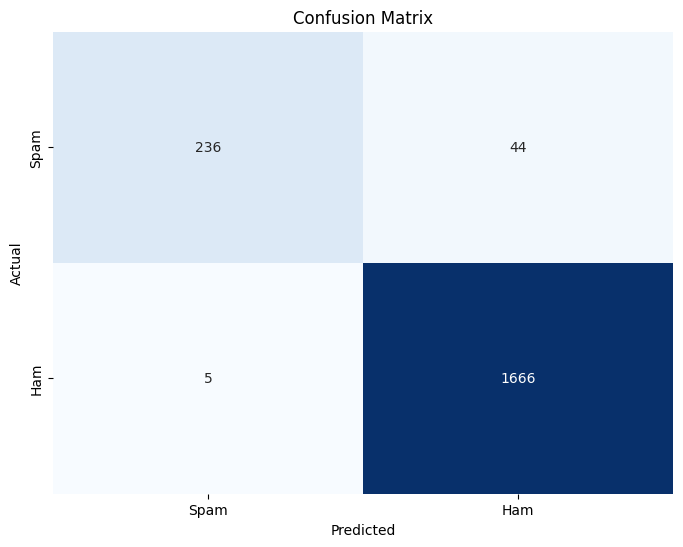

In [12]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Classification Report (Random Forest Classifier)

In [13]:
classification_rep = classification_report(Y_test, prediction_on_test_data, target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.84      0.91       280
         Ham       0.97      1.00      0.99      1671

    accuracy                           0.97      1951
   macro avg       0.98      0.92      0.95      1951
weighted avg       0.97      0.97      0.97      1951



 ## Feature Importance Visualization (Random Forest)

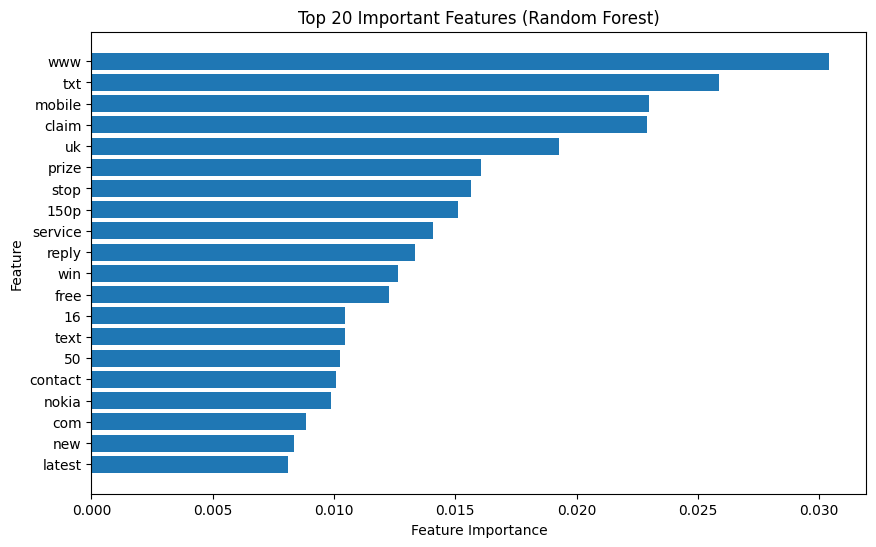

In [14]:
feature_importance = model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_idx = np.argsort(feature_importance)[-20:]  # Top 20 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 20 Important Features (Random Forest)")
plt.show()


## Make Predictions on New Input (Random Forest Classifier)

In [15]:
input_your_mail = "Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life"
input_data_features = tfidf_vectorizer.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
